# Arrivalist Data  Challenge

Prompt:
How can we differentiate between good users versus bad users?

If we are to create a model to classify these users:
- what kind of features ought we construct from the data? How should we explore the data? 
- Can you identify users in this data that are noisy vs clean in terms of travel? 
- What other kinds of questions can/should you ask about the data?

This is an open ended problem. Please feel free to reach out if you have any questions.


In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

In [503]:
import datetime as dt

In [1205]:
import gc
gc.collect()

20

In [6]:
import geopandas as gpd
from geopy.distance import distance

## Read Data

In [8]:
df_travel = pd.read_csv('interview_data.csv')

/storage/home/lul165/.conda/envs/llyenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Description

In [9]:
df_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16125354 entries, 0 to 16125353
Data columns (total 13 columns):
device_id       int64
ts              object
ts_date         object
ts_quarter      object
lat             float64
lon             float64
geohash5        object
country         object
region          object
city            object
zip_code        object
publisher_id    float64
partner_id      int64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.6+ GB


In [101]:
df_travel.describe()

,device_id,lat,lon,publisher_id,partner_id
count,1.612535e+07,1.612535e+07,1.612535e+07,8.913284e+06,1.612535e+07
mean,2.020161e+03,3.717414e+01,-9.263365e+01,9.674115e+17,1.686466e+00
std,8.408644e+03,5.339480e+00,1.862537e+01,2.393162e+18,6.741262e-01
min,1.000000e+00,-3.807455e+01,-1.597172e+02,1.003000e+03,1.000000e+00
25%,2.050000e+02,3.397732e+01,-9.848565e+01,1.156000e+03,1.000000e+00
50%,3.720000e+02,3.796560e+01,-8.678347e+01,5.009000e+03,2.000000e+00
75%,8.790000e+02,4.036284e+01,-8.024539e+01,5.009000e+03,2.000000e+00
max,6.847600e+04,6.507238e+01,1.512167e+02,9.153270e+18,3.000000e+00


In [80]:
df_travel[0:20]

,device_id,ts,ts_date,ts_quarter,lat,lon,geohash5,country,region,city,zip_code,publisher_id,partner_id
0,1,2018-01-02 18:10:01,2018-01-02,2018-01-01,38.70031,-90.47151,9yzsj,usa,mo,st louis,63146,5009.0,1
1,1,2018-01-02 18:10:02,2018-01-02,2018-01-01,38.70051,-90.47162,9yzsj,usa,mo,st louis,63146,5009.0,1
2,1,2018-01-02 18:29:06,2018-01-02,2018-01-01,38.73263,-90.67430,9yzs2,usa,mo,st charles,63304,5009.0,1
3,1,2018-01-02 18:29:11,2018-01-02,2018-01-01,38.73261,-90.67434,9yzs2,usa,mo,st charles,63304,5009.0,1
4,1,2018-01-02 18:29:13,2018-01-02,2018-01-01,38.73261,-90.67434,9yzs2,usa,mo,st charles,63304,5009.0,1
5,1,2018-01-02 18:29:28,2018-01-02,2018-01-01,38.73263,-90.67438,9yzs2,usa,mo,st charles,63304,5009.0,1
6,1,2018-01-02 18:29:33,2018-01-02,2018-01-01,38.73261,-90.67439,9yzs2,usa,mo,st charles,63304,5009.0,1
7,1,2018-01-02 18:29:38,2018-01-02,2018-01-01,38.73261,-90.67434,9yzs2,usa,mo,st charles,63304,5009.0,1
8,1,2018-01-02 18:29:38,2018-01-02,2018-01-01,38.73262,-90.67434,9yzs2,usa,mo,st charles,63304,NaN,2
9,1,2018-01-02 18:29:43,2018-01-02,2018-01-01,38.73263,-90.67431,9yzs2,usa,mo,st charles,63304,5009.0,1


In [104]:
df_travel['device_id'].unique().shape

(1089,)

Total User number: 1089

In [105]:
df_travel.isna().any()

device_id       False
ts              False
ts_date         False
ts_quarter      False
lat             False
lon             False
geohash5        False
country         False
region          False
city            False
zip_code        False
publisher_id     True
partner_id      False
dtype: bool

### Full Data
- Total User number: 1089
- Missing Value in publisher_id: Do not matter at this stage

### Small Sample Exploration
- Take Several Users

In [10]:
df_sp = df_travel[df_travel['device_id']<35]

In [11]:
## Convert string to timestamp
datetime = df_sp['ts'].apply(lambda x:dt.datetime.strptime(x,'%Y-%m-%d %X'))
datetime = datetime.rename('dt')

df_sp = pd.concat([df_sp,datetime],axis=1)

In [1088]:
df_sp['year'] = df_sp['dt'].map(lambda x: x.year)
df_sp['month'] = df_sp['dt'].map(lambda x: x.month)
df_sp['day'] = df_sp['dt'].map(lambda x: x.day)
df_sp['weekday'] = df_sp['dt'].map(lambda x: x.weekday())
df_sp['week'] = df_sp['dt'].map(lambda x: x.week)
df_sp['date'] = df_sp['dt'].map(lambda x: x.date())

In [13]:
## Users included in the sample
df_sp['device_id'].unique()

array([ 1,  2,  6,  8, 11, 13, 18, 19, 20, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 33])

In [331]:
## Some user has multiple publisher ID
df_sp[df_sp['device_id']==20]['publisher_id'].unique()

array([           nan, 1.15400000e+03, 1.15600000e+03, 1.14500000e+03,
       1.00300000e+03, 6.53079112e+18, 1.42934202e+18, 1.85157059e+17,
       5.25626457e+18, 4.12621294e+18, 8.99631425e+18, 3.49038444e+17,
       5.95568977e+17, 4.81777359e+18, 2.21523270e+17, 4.66213289e+18,
       2.38449931e+17, 8.43738976e+17, 8.11870489e+18, 3.25100000e+03,
       1.22540000e+04])

### Time-series Resampling

In [ ]:
## Time-series Resampling for each user using a 5 mins sliding window
df_sp_rs = df_sp.set_index('dt').groupby('device_id').resample('5T').first().dropna().drop(['device_id'],axis=1).reset_index()
df_sp_rs.describe()

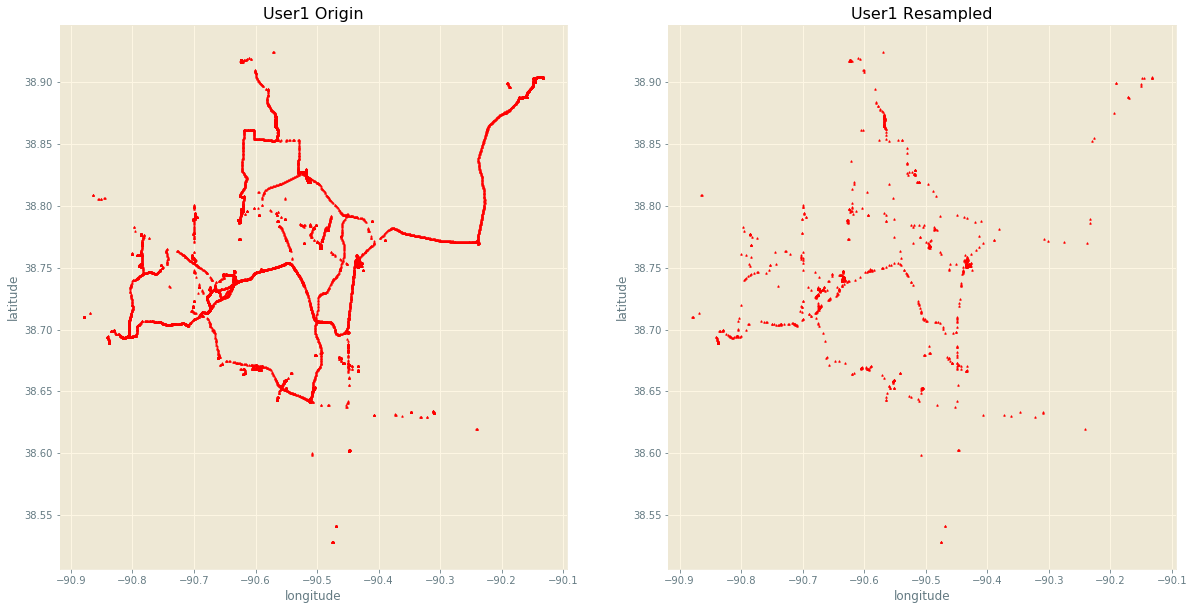

In [315]:
## Before and After resampling

fig = plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.scatter(df_sp[df_sp['device_id']==1]['lon'], df_sp[df_sp['device_id']==1]['lat'],s=2, marker='^',color='red')
plt.xlabel(r"longitude")
plt.ylabel(r"latitude")
plt.title('User1 Origin')

plt.subplot(1, 2, 2)
plt.scatter(df_sp_rs[df_sp_rs['device_id']==1]['lon'], df_sp_rs[df_sp_rs['device_id']==1]['lat'],s=2, marker='^',color='red')
plt.xlabel(r"longitude")
plt.ylabel(r"latitude")
plt.title('User1 Resampled')

plt.show()


In [952]:
from ipywidgets import interact, IntSlider,SelectionSlider,Dropdown

def plot_user_loc(userid,date_dis):
    plt.figure(figsize=(12,6))
#     plt.axes().set_aspect('equal')
    plt.subplot(1, 2, 1)
    plt.scatter(df_sp[(df_sp['device_id']==userid) & (df_sp['ts_date']==date_dis)]['lon'],
                df_sp[(df_sp['device_id']==userid) & (df_sp['ts_date']==date_dis)]['lat'],
                s=2, marker='^',color='red')    
    plt.xlabel(r"longitude")
    plt.ylabel(r"latitude")
    plt.title('User Origin')
    
    plt.subplot(1, 2, 2)
    plt.scatter(df_sp_rs[(df_sp_rs['device_id']==userid) & (df_sp_rs['ts_date']==date_dis)]['lon'],
                df_sp_rs[(df_sp_rs['device_id']==userid) & (df_sp_rs['ts_date']==date_dis)]['lat'],
                s=2, marker='^',color='red')    
    plt.xlabel(r"longitude")
    plt.ylabel(r"latitude")
    plt.title('User Resample')
    
interact(plot_user_loc, userid = Dropdown(description='User',options=list(df_sp['device_id'].unique())),
                        date_dis = SelectionSlider(description='date',
                                                   options=list(df_sp[df_sp['device_id']==1]['ts_date'].unique()),
                                                   style = {'description_width': 'initial'}))

interactive(children=(Dropdown(description='User', options=(1, 2, 6, 8, 11, 13, 18, 19, 20, 23, 24, 25, 26, 27…

<function __main__.plot_user_loc(userid, date_dis)>

In [335]:
df_sp[df_sp['device_id']==8]

,device_id,ts,ts_date,ts_quarter,lat,lon,geohash5,country,region,city,zip_code,publisher_id,partner_id,dt,year,month,day,weekday,week
45767,8,2018-01-01 00:59:54,2018-01-01,2018-01-01,41.294451,-80.866408,dpq6z,usa,oh,warren,44483,NaN,2,2018-01-01 00:59:54,2018,1,1,0,1
45768,8,2018-01-01 00:59:54,2018-01-01,2018-01-01,41.294450,-80.866400,dpq6z,usa,oh,warren,44483,NaN,2,2018-01-01 00:59:54,2018,1,1,0,1
45769,8,2018-01-01 00:59:54,2018-01-01,2018-01-01,41.294450,-80.866400,dpq6z,usa,oh,warren,44483,1.172000e+03,1,2018-01-01 00:59:54,2018,1,1,0,1
45770,8,2018-01-01 02:03:41,2018-01-01,2018-01-01,41.294440,-80.866220,dpq6z,usa,oh,warren,44483,NaN,2,2018-01-01 02:03:41,2018,1,1,0,1
45771,8,2018-01-01 02:03:41,2018-01-01,2018-01-01,41.294440,-80.866220,dpq6z,usa,oh,warren,44483,1.172000e+03,1,2018-01-01 02:03:41,2018,1,1,0,1
45772,8,2018-01-01 02:03:41,2018-01-01,2018-01-01,41.294447,-80.866223,dpq6z,usa,oh,warren,44483,NaN,2,2018-01-01 02:03:41,2018,1,1,0,1
45773,8,2018-01-01 03:01:20,2018-01-01,2018-01-01,41.294460,-80.866210,dpq6z,usa,oh,warren,44483,NaN,2,2018-01-01 03:01:20,2018,1,1,0,1
45774,8,2018-01-01 03:01:20,2018-01-01,2018-01-01,41.294460,-80.866210,dpq6z,usa,oh,warren,44483,1.172000e+03,1,2018-01-01 03:01:20,2018,1,1,0,1
45775,8,2018-01-01 03:01:20,2018-01-01,2018-01-01,41.294468,-80.866217,dpq6z,usa,oh,warren,44483,NaN,2,2018-01-01 03:01:20,2018,1,1,0,1
45776,8,2018-01-01 04:02:07,2018-01-01,2018-01-01,41.294430,-80.866160,dpq6z,usa,oh,warren,44483,NaN,2,2018-01-01 04:02:07,2018,1,1,0,1


### Data Cleaning
- Single user based
- For each point, compute the travel speed from previous point and to next point
- If any travel speed is unreasonable, tag current point an invalid point

In [372]:
## Create (lat,lon) tuple
# df_sp_rs['lat_3'] = df_sp_rs['lat'].apply(lambda x: round(x,3))
# df_sp_rs['lon_3'] = df_sp_rs['lon'].apply(lambda x: round(x,3))
df_sp_rs['lat_lon_3'] = df_sp_rs[['lat','lon']].apply(lambda x: (round(x.iloc[0],3),round(x.iloc[1],3)),axis=1)

In [653]:
test = gp.get_group(6)

In [654]:
row_iterator = test.iterrows()
last = next(row_iterator)[1]
travel_speed = pd.DataFrame(index=test.index,columns=['speed'])
time = pd.DataFrame(index=test.index,columns=['time'])
dist = pd.DataFrame(index=test.index,columns=['dist'])

for i, row in row_iterator:

    travel_speed.loc[i] = distance(row['lat_lon_3'],last['lat_lon_3']).km/((row['dt']-last['dt']).seconds)*3600
    dist.loc[i] = distance(row['lat_lon_3'],last['lat_lon_3']).km
    time.loc[i] = ((row['dt']-last['dt']).seconds)/3600
    last = row
test = test.join(travel_speed).join(dist).join(time)

In [678]:
def tspeed_est(data):
    
    row_iter = data.iterrows()
    last = next(row_iter)[1]
    travel_speed = pd.DataFrame(index=data.index,columns=['time','dist','tspeed'])

    for i, row in row_iter:
        travel_speed.loc[i]['time'] = round(((row['dt']-last['dt']).seconds)/3600,4)
        travel_speed.loc[i]['dist'] = round(distance(row['lat_lon_3'],last['lat_lon_3']).km,4)
        
        try:
            travel_speed.loc[i]['tspeed'] = round(travel_speed.loc[i]['dist'] / travel_speed.loc[i]['time'],4)
        except:
            travel_speed.loc[i] = -999
            
        last = row    
        
    return travel_speed

In [684]:
gp = df_sp_rs.groupby('device_id')
temp = []
for key, data in gp:
    temp.append(tspeed_est(data))
ts = pd.concat(temp)
df_sp_rs = df_sp_rs.join(ts)

In [719]:
df_sp_rs['tspeed'].quantile(0.00001), df_sp_rs['tspeed'].quantile(0.995)

(-99.0, 102.16366750000014)

In [767]:
index_an = df_sp_rs[(df_sp_rs['tspeed']<0)|(df_sp_rs['tspeed']>1000)].index
index_an = index_an.append(index_an-1)

In [770]:
df_sp_rs.iloc[np.sort(index_an)][0:5]

,device_id,dt,ts,ts_date,ts_quarter,lat,lon,geohash5,country,region,...,partner_id,year,month,day,weekday,week,lat_lon_3,time,dist,tspeed
12535,8,2018-02-26 13:20:00,2018-02-26 13:21:10,2018-02-26,2018-01-01,30.927619,-81.685925,djmzv,usa,ga,...,2.0,2018.0,2.0,26.0,0.0,9.0,"(30.928, -81.686)",1,19.5038,19.5038
12536,8,2018-02-26 13:25:00,2018-02-26 13:27:10,2018-02-26,2018-01-01,31.651889,-81.392975,djwh5,usa,ga,...,2.0,2018.0,2.0,26.0,0.0,9.0,"(31.652, -81.393)",0.0833,84.9825,1020.2
14006,8,2018-04-30 15:15:00,2018-04-30 15:17:09,2018-04-30,2018-04-01,41.251320,-80.748980,dpqdd,usa,oh,...,1.0,2018.0,4.0,30.0,0.0,18.0,"(41.251, -80.749)",1.3333,0.1111,0.0833
14007,8,2018-05-01 15:15:00,2018-05-01 15:17:05,2018-05-01,2018-04-01,41.294580,-80.866270,dpq6z,usa,oh,...,1.0,2018.0,5.0,1.0,1.0,18.0,"(41.295, -80.866)",-99,-99,-99
14076,8,2018-05-04 13:45:00,2018-05-04 13:49:42,2018-05-04,2018-04-01,44.999400,-93.297000,9zvxu,usa,mn,...,1.0,2018.0,5.0,4.0,4.0,18.0,"(44.999, -93.297)",1.75,1090.33,623.046


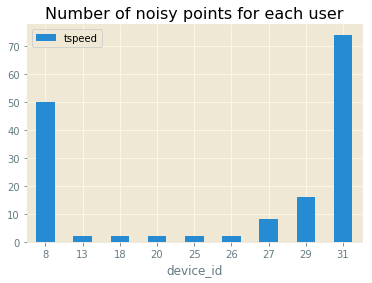

In [863]:
df_sp_rs.iloc[np.sort(index_an)][['device_id','tspeed']].groupby('device_id').count() \
                                                        .plot.bar(rot=0,title='Number of noisy points for each user')

In [371]:
from geopy.distance import distance
coords_1 = (38.700,-90.471)
coords_2 = (38.701,-90.471)

print(distance(coords_1, coords_2).km)

0.11100977278453837


### Stay Point Detection

In [788]:
df_sp_rs['mon_fri'] = (df_sp_rs['weekday'] < 5)*1
df_sp_rs['sat_sun'] = (df_sp_rs['weekday'] > 4 )*1

In [1085]:
df_sp_stop = df_sp_rs[['device_id','date','lat_lon_3','dt']] \
                                            .groupby(['device_id','date','lat_lon_3']).count().reset_index()
df_sp_stop = df_sp_stop.drop(df_sp_stop[df_sp_stop['dt']==stop_dur].index).reset_index().rename(columns={'lat_lon_3':'stop_point'})
df_sp_stop[0:5]

,index,device_id,date,stop_point,dt
0,2,1,2018-01-02,"(38.733, -90.674)",4
1,5,1,2018-01-03,"(38.733, -90.674)",5
2,10,1,2018-01-03,"(38.793, -90.595)",2
3,12,1,2018-01-04,"(38.733, -90.674)",3
4,20,1,2018-01-05,"(38.753, -90.435)",2


In [1091]:
def plot_stay_point(userid,date_dis):
    
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(1, 2, 1)
  
 
    ax1.scatter(df_sp[(df_sp['device_id']==userid) & (df_sp['date']==date_dis)]['lon'],
                    df_sp[(df_sp['device_id']==userid) & (df_sp['date']==date_dis)]['lat'],
                     s = 2, marker='^',color='red')  
    plt.xlabel(r"longitude")
    plt.ylabel(r"latitude")
    plt.title('User Origin')
    
#     plt.subplot(1, 2, 2)
    
    ax2 = fig.add_subplot(1, 2, 2, sharex=ax1,sharey=ax1) 
    pointlist = list(zip(*df_sp_stop[(df_sp_stop['device_id']==userid) & (df_sp_stop['date']==date_dis)]['stop_point']))
    
   
    ax2.scatter(list(pointlist[1]),list(pointlist[0]), s=30, marker='o',color='blue')  
   
    
interact(plot_stay_point, userid = Dropdown(description='User',options=list(df_sp_stop['device_id'].unique())),
                        date_dis = SelectionSlider(description='date',
                                                   options=list(df_sp_stop[df_sp_stop['device_id']==1]['date'].unique()),
                                                   style = {'description_width': 'initial'}))

interactive(children=(Dropdown(description='User', options=(1, 2, 6, 8, 11, 13, 18, 19, 20, 23, 25, 26, 27, 28…

<function __main__.plot_stay_point(userid, date_dis)>

In [1092]:
stop_dur = 1 ## stop more than 5 mins count stop point

df_sp_stop = df_sp_rs[['device_id','date','lat_lon_3','dt']] \
                                            .groupby(['device_id','date','lat_lon_3']).count().reset_index()
df_sp_stop = df_sp_stop.drop(df_sp_stop[df_sp_stop['dt']==stop_dur].index).rename(columns={'lat_lon_3':'stop_point'})

df_sp_stopnum = df_sp_stop[['device_id','date','stop_point']].groupby(['device_id','date']).count().reset_index() \
                                                                .rename(columns={'stop_point':'stop_num'})
df_sp_stopnum[0:5]

,device_id,date,stop_num
0,1,2018-01-02,1
1,1,2018-01-03,2
2,1,2018-01-04,1
3,1,2018-01-05,1
4,1,2018-01-06,4


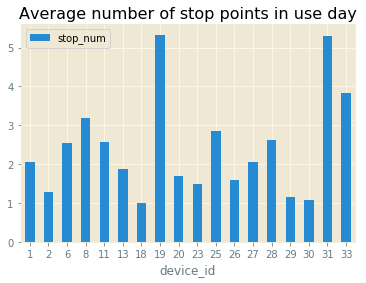

In [1093]:
df_sp_daystopnum = df_sp_stopnum.groupby('device_id').mean()
df_sp_daystopnum.plot.bar(rot=0,title='Average number of stop points in use day')

## User-based feature engineering

### 1. Time-based features

**Daily Frequency - Average App Exporsure**
- Data collection frequency / collection time-period
- measureing user's exposure to us

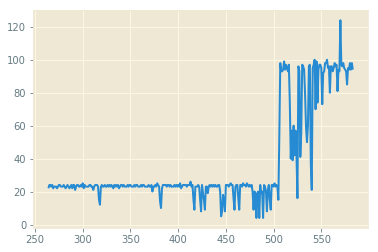

In [1094]:
## User 8 useage frequency vs. use-day
df_daggre_sp = df_sp_rs[['device_id','date','ts']].groupby(['device_id','date']).count().reset_index()
plt.plot(df_daggre_sp[df_daggre_sp['device_id']==8]['ts'])

In [356]:
# Daily usage frquency (at a 5 min pace) of the period when data were collected
user_freq = pd.DataFrame(df_sp_rs[['device_id','dt']].groupby('device_id')['dt'] \
                         .apply(lambda x: x.count() / ((x.max() - x.min()).days + 1)))
user_freq = user_freq.rename(columns = {'dt':'avg_daily_freq'})

**Use Day Frequency**
- Average Data collection frequency at a using date
- Another exporsure feature

In [357]:
## Average use-day frequency
freq_day = df_sp_rs[['device_id','ts_date','ts']].groupby(['device_id','ts_date']).count().groupby('device_id').mean()
freq_day = freq_day.rename(columns={'ts':'avg_useday_freq'})

In [358]:
user_freq = user_freq.join(freq_day)
user_freq[0:5]

,avg_daily_freq,avg_useday_freq
device_id,,
1,11.125000,12.361111
2,1.547445,6.424242
6,51.550265,79.211382
8,32.413699,36.971875
11,8.287770,16.457143


### Autocorrelation

Time-series Feature: autocorrelation of use day frequency
- Correlation of app using (GPS exposure) vs the time?
- Indicated the phone use behavior

In [1022]:
df_user1 = df_sp_rs[['device_id','ts_date','ts']].groupby(['device_id','ts_date']).count().reset_index()

In [1028]:
df_sp_rs['date'] = df_sp_rs['dt'].map(lambda x: x.date())

In [1037]:
df_sp_freq = df_sp_rs[['device_id','date','dt']].groupby(['device_id','date']).count() \
                                   .rename(columns={'dt':'useday_freq'}).reset_index()

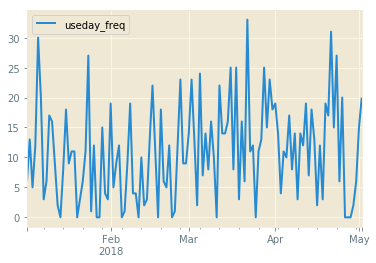

In [1065]:
df_user1 = df_sp_freq[df_sp_freq['device_id']==1].set_index('date')
idx = pd.date_range(min(df_user1.index), max(df_user1.index))
df_user1 = df_user1.drop('device_id',axis=1).reindex(idx, fill_value=0)
df_user1.plot()

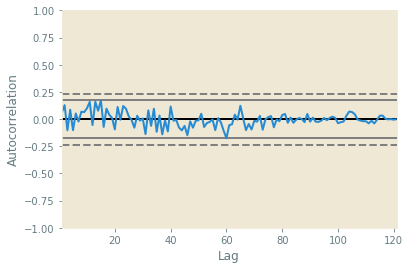

In [1061]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_user1)

In [1105]:
from statsmodels.tsa.ar_model import AR
ar_model = AR(df_user1).fit()

print('Lag: {}' .format(ar_model.k_ar))
# print('Coefficients: {}'. format(ar_model.params))

Lag: 13


Time-series Feature: autocorrelation of use day stop points
- Correlation of daily stop points vs. time
- User characteristics

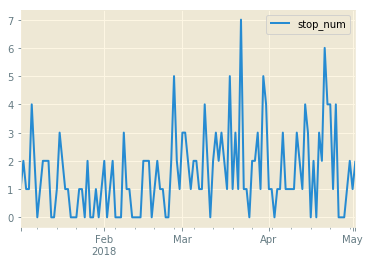

In [1098]:
# df_stay_user1 = df_sp_stopnum[df_sp_stopnum['device_id']==1].set_index('date')
# idx = pd.date_range(min(df_stay_user1.index), max(df_stay_user1.index))
# df_stay_user1 = df_stay_user1.drop('device_id',axis=1).reindex(idx, fill_value=0)
# df_stay_user1.plot()

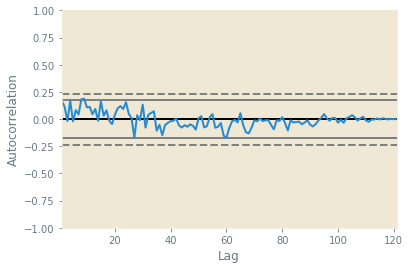

In [1100]:
# autocorrelation_plot(df_stay_user1)

In [1104]:
# ar_model = AR(df_stay_user1).fit()

# print('Lag: {}' .format(ar_model_2.k_ar))
# # print('Coefficients: {}'. format(ar_model.params))

Lag: 13


### 2. GeoSpatial Features

** Location clustering (Daily,Weekday/Weekend, Monthly aggregation)**
- Specify stop spot clustering method
- Kmeans clustering hotspot method

In [717]:
from sklearn import base
from collections import Counter, defaultdict


class GroupbyEstimator(base.BaseEstimator, base.RegressorMixin):
    
    def __init__(self, column, estimator_factory):
        self.column = column
        self.estimator_factory = estimator_factory

    def fit(self, X):
        """
        Create one estimator for each column group
        then fit data in the group
        """
        self.X = X
        self.g = self.X.groupby(self.column)
        self.model_dict = dict.fromkeys(list(self.g.groups.keys()),self.estimator_factory())

        for key,data in self.g:
            ind = data.index
            self.X_sub = data.drop(self.column,axis=1)
            self.model_dict[key].fit(self.X_sub)

        return self

    def predict(self):
        
        """
        Return a dict, keys are the column group, values are the Kmean centriod
        """
        self.gp = self.X.groupby(self.column)

        self.centers = {}
        self.cluster_points = {}
        
        for key,data in self.gp:
            self.centers[key] = self.model_dict[key].cluster_centers_
            self.cluster_points[key] = Counter(self.model_dict[key].labels_) 
        
        return self

In [718]:
def estimator_factory():
    kmeans = KMeans(n_clusters=4, max_iter=300, n_init=10) 
    return kmeans

### 3. Activity-based features

In [740]:
## Are there any intertional traveler?
df_travel[df_travel['country']=='usa']['device_id'].unique().shape, \
df_travel[df_travel['country']!='usa']['device_id'].unique().shape, \
df_travel['device_id'].unique().shape

((1088,), (174,), (1089,))

** International, Domestic, Local Traveler**
- Ineternational / regionwide / citywide traveler / local traveler
- Significant difference in travel behaviors and customer value
- Help identify marketing target

In [161]:
## Yearly travel country and cities
avg_country_yr = df_sp.groupby('device_id')['country'].nunique().reset_index().set_index('device_id')
avg_city_yr = df_sp.groupby('device_id')['city'].nunique().reset_index().set_index('device_id')
avg_region_yr = df_sp.groupby('device_id')['region'].nunique().reset_index().set_index('device_id')

In [162]:
## Monthly travel country and cities
avg_country_m = df_sp.groupby(['device_id','month'])['country'].nunique() \
                .reset_index()[['device_id','country']].groupby('device_id').mean()
    
avg_city_m = df_sp.groupby(['device_id','month'])['city'].nunique() \
                .reset_index()[['device_id','city']].groupby('device_id').mean()
    
avg_region_m = df_sp.groupby(['device_id','month'])['region'].nunique() \
                .reset_index()[['device_id','region']].groupby('device_id').mean()

In [163]:
df_sp[(df_sp['device_id']==27) & (df_sp['country']!='usa')]['region'].unique()

array(['fi', 'pi', 'mi', 'on', 'qc'], dtype=object)

In [164]:
## Weekly traveled country and cities
avg_country_w = df_sp.groupby(['device_id','week'])['country'].nunique() \
                .reset_index()[['device_id','country']].groupby('device_id').mean()
    
avg_city_w = df_sp.groupby(['device_id','week'])['city'].nunique() \
                .reset_index()[['device_id','city']].groupby('device_id').mean()

avg_region_w = df_sp.groupby(['device_id','week'])['region'].nunique() \
                .reset_index()[['device_id','region']].groupby('device_id').mean()

In [166]:
travel_region = pd.concat([avg_country_yr, avg_country_m, avg_country_w, avg_city_yr, avg_city_m, avg_city_w,
                           avg_region_yr, avg_region_m, avg_region_w],axis=1)
travel_region.columns = ['avg_country_yr','avg_country_m','avg_country_w','avg_city_yr','avg_city_m','avg_city_w',
                        'avg_region_yr', 'avg_region_m', 'avg_region_w']

In [1106]:
travel_region[-6:-3]

,avg_country_yr,avg_country_m,avg_country_w,avg_city_yr,avg_city_m,avg_city_w,avg_region_yr,avg_region_m,avg_region_w
device_id,,,,,,,,,
27,3,2.000000,1.222222,46,18.0,6.777778,12,5.666667,2.555556
28,2,1.333333,1.111111,12,5.0,2.777778,3,1.666667,1.222222
29,1,1.000000,1.000000,4,2.0,1.235294,2,1.750000,1.176471


**Trip Activity**
- get the geospatial info and land use for user stay points

In [1125]:
# df_sp_stop[df_sp_stop['dt']>33]

df_sp_stayagg = df_sp_stop.groupby(['device_id','stop_point']).agg({'date':'count','dt':'sum'}).reset_index() \
                                                            .rename(columns={'dt':'stay_dur'})
df_stayagg_user31 = df_sp_stayagg[df_sp_stayagg['device_id']==31].nlargest(5,'stay_dur')

In [1147]:
df_stayagg_user31

,device_id,stop_point,date,stay_dur
1327,31,"(40.366, -79.964)",275,3918
1239,31,"(40.342, -79.946)",85,2861
1332,31,"(40.367, -79.964)",216,2090
1395,31,"(40.424, -80.039)",34,605
1236,31,"(40.342, -79.95)",81,603


In [1123]:
import folium

In [1203]:
m = folium.Map(location=[df_stayagg_user31['stop_point'].iloc[1][0], df_stayagg_user31['stop_point'].iloc[1][1]], tiles="CartoDB dark_matter", zoom_start=11)

for i in range(0,len(df_stayagg_user31)):
    folium.Circle(
      location=[df_stayagg_user31['stop_point'].iloc[i][0],df_stayagg_user31['stop_point'].iloc[i][1]],
      popup='Days:{}'.format(df_stayagg_user31['date'].iloc[i]),
      radius= df_stayagg_user31.iloc[i]['stay_dur']*0.1,
      color='orangered',
      fill=True,
      fill_color='orange'
    ).add_to(m)
m